# Using a State-Of-The-Art (SOTA) GANs

In this exercise you will get to experiment with some modern and best-in-class GANs.

These GANs have been built with the [StyleGAN-3](https://nvlabs.github.io/stylegan3/) system by NVIDIA. Since here we will only use them for inference - no training necessary - we will not need a lot of code.

Let's start by importing all the modules we will need:

# Usando GANs de última geração (SOTA)

Neste exercício, você experimentará alguns GANs modernos e melhores da categoria.

Essas GANs foram construídas com o sistema [StyleGAN-3](https://nvlabs.github.io/stylegan3/) da NVIDIA. Como aqui iremos usá-los apenas para inferência - não é necessário treinamento - não precisaremos de muito código.

Vamos começar importando todos os módulos que precisaremos:

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import torch

Now we can load one of the models. There are several GANs available for use directly from the authors. You can find the full list [here](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/research/models/stylegan3/files).

For this exercise, we are going to experiment with a StyleGAN trained on the [Animal Faces-HQ](https://paperswithcode.com/dataset/afhq) dataset. It can generate unconditionally images of animals.

Let's load the model. In this case, the authors decided to export their models in a special pickle file containing all the needed code:

> NOTE: in order to use it on your own, remember to download the [StyleGAN3](https://github.com/NVlabs/stylegan3) repo and put it in your PYTHONPATH or do this:

Agora podemos carregar um dos modelos. Existem vários GANs disponíveis para uso diretamente dos autores. Você pode encontrar a lista completa [aqui](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/research/models/stylegan3/files).

Para este exercício, vamos experimentar um StyleGAN treinado no conjunto de dados [Animal Faces-HQ](https://paperswithcode.com/dataset/afhq). Pode gerar incondicionalmente imagens de animais.

Vamos carregar o modelo. Neste caso, os autores decidiram exportar seus modelos em um arquivo pickle especial contendo todo o código necessário:

> NOTA: para usá-lo por conta própria, lembre-se de baixar o repositório [StyleGAN3](https://github.com/NVlabs/stylegan3) e colocá-lo em seu PYTHONPATH ou fazer isto:

In [2]:
# Add styleGAN3 repo to the paths where python
# searches for modules
import sys
sys.path.append("/home/student/stylegan3")

In [3]:
with open('/home/student/.cache/dnnlib/downloads/20755e1ffb4380580e4954f8b0f9e630_stylegan3-r-afhqv2-512x512.pkl', 'rb') as f:
    stylegan_model = pickle.load(f)

Let's look at what's inside:

Vejamos o que há dentro:

In [4]:
stylegan_model.keys()

dict_keys(['training_set_kwargs', 'G', 'D', 'G_ema', 'augment_pipe', 'kwargs'])

Can you guess what do the `G` and `D` stand for here?

> **YOUR ANSWER HERE**

Você consegue adivinhar o que significam `G` e `D` aqui?

> **Gerador e Discriminador**

What about `G_ema`?

> **YOUR ANSWER HERE**

E quanto a `G_ema`?

> **SUA RESPOSTA AQUI**

We can ignore the rest of the keys. Ok, so let's get the Exponential Moving Average Generator then:

Podemos ignorar o resto das chaves. Ok, então vamos pegar o Gerador de Média Móvel Exponencial:

In [5]:
G = stylegan_model['G_ema'] # YOUR CODE HERE
G

Generator(
  (synthesis): SynthesisNetwork(
    w_dim=512, num_ws=16,
    img_resolution=512, img_channels=3,
    num_layers=14, num_critical=2,
    margin_size=10, num_fp16_res=4
    (input): SynthesisInput(
      w_dim=512, channels=1024, size=[36, 36],
      sampling_rate=16, bandwidth=2
      (affine): FullyConnectedLayer(in_features=512, out_features=4, activation=linear)
    )
    (L0_36_1024): SynthesisLayer(
      w_dim=512, is_torgb=False,
      is_critically_sampled=False, use_fp16=False,
      in_sampling_rate=16, out_sampling_rate=16,
      in_cutoff=2, out_cutoff=2,
      in_half_width=6, out_half_width=6,
      in_size=[36, 36], out_size=[36, 36],
      in_channels=1024, out_channels=1024
      (affine): FullyConnectedLayer(in_features=512, out_features=1024, activation=linear)
    )
    (L1_36_1024): SynthesisLayer(
      w_dim=512, is_torgb=False,
      is_critically_sampled=False, use_fp16=False,
      in_sampling_rate=16, out_sampling_rate=16,
      in_cutoff=2, out_c

We can see that the Generator network here is a lot more complex than what we used in our exercise from scratch. You can refere to the StyleGAN3 repo and paper for details.

We won't need it for generating, but just for fun, let's also get the Discriminator network and have a look at it:

Podemos ver que a rede do Gerador aqui é muito mais complexa do que a que usamos em nosso exercício do zero. Você pode consultar o repositório e o documento StyleGAN3 para obter detalhes.

Não vamos precisar dela para gerar, mas apenas para nos divertir, vamos também pegar a rede Discriminator e dar uma olhada nela:

In [6]:
D = stylegan_model['D'] # YOUR CODE HERE
D

Discriminator(
  c_dim=0, img_resolution=512, img_channels=3
  (b512): DiscriminatorBlock(
    resolution=512, architecture=resnet
    (fromrgb): Conv2dLayer(in_channels=3, out_channels=64, activation=lrelu, up=1, down=1)
    (conv0): Conv2dLayer(in_channels=64, out_channels=64, activation=lrelu, up=1, down=1)
    (conv1): Conv2dLayer(in_channels=64, out_channels=128, activation=lrelu, up=1, down=2)
    (skip): Conv2dLayer(in_channels=64, out_channels=128, activation=linear, up=1, down=2)
  )
  (b256): DiscriminatorBlock(
    resolution=256, architecture=resnet
    (conv0): Conv2dLayer(in_channels=128, out_channels=128, activation=lrelu, up=1, down=1)
    (conv1): Conv2dLayer(in_channels=128, out_channels=256, activation=lrelu, up=1, down=2)
    (skip): Conv2dLayer(in_channels=128, out_channels=256, activation=linear, up=1, down=2)
  )
  (b128): DiscriminatorBlock(
    resolution=128, architecture=resnet
    (conv0): Conv2dLayer(in_channels=256, out_channels=256, activation=lrelu, up=1

The Discriminator looks a lot more like a normal Convolutional Neural Network. Note however that the output of the discriminator is 1 number with a linear activation:

```
(out): FullyConnectedLayer(in_features=512, out_features=1, activation=linear)
```
instead of a Sygmoid activation as we used before. Why? Because this is actually a Critic network more than a Discriminator network, so the output is a score for the input image, and not a class probability as in the case of the DCGAN we have seen before.

Anyway, now we are ready to generate an image.

O Discriminador se parece muito mais com uma Rede Neural Convolucional normal. Observe, entretanto, que a saída do discriminador é 1 número com ativação linear:

```
(fora): FullyConnectedLayer(in_features=512, out_features=1, ativação=linear)
```
em vez de uma ativação Sygmoid como usamos antes. Por que? Como esta é na verdade uma rede crítica mais do que uma rede discriminadora, a saída é uma pontuação para a imagem de entrada, e não uma probabilidade de classe como no caso do DCGAN que vimos antes.

De qualquer forma, agora estamos prontos para gerar uma imagem.

In [7]:
z_dim = G.z_dim

# Generate a latent code with batch dimension of 1
# and latent dimension z_dim
# Remember: you can generate random numbers distributed as a 
# normal distribution using torch.randn
z = torch.randn([1, z_dim]) # YOUR CODE HERE

Now let's move everything to the GPU:

Agora vamos mover tudo para a GPU:

In [8]:
z = z.to("cuda")
G = G.to("cuda")

Great, now call the Generator network:

> NOTE: StyleGAN3 can also be class-conditioned, i.e., conditioned to generate a specific class in the dataset. This model we are using is not, so our class tensor will just be None

Ótimo, agora ligue para a rede do Gerador:

> NOTA: StyleGAN3 também pode ser condicionado por classe, ou seja, condicionado para gerar uma classe específica no conjunto de dados. Este modelo que estamos usando não é, então nosso tensor de classe será apenas None

In [10]:
c = None
# Call the Generator passing in the latent.
img = G(z, c) # YOUR CODE HERE

The image generated by the network contains values distributed more or less in the range -1 to +1, but not exactly. We need to convert that to a RGB image and trucante the values that are outside of the range. We can do all of that like this:

A imagem gerada pela rede contém valores distribuídos mais ou menos na faixa de -1 a +1, mas não exatamente. Precisamos converter isso para uma imagem RGB e truncar os valores que estão fora do intervalo. Podemos fazer tudo isso assim:

In [11]:
# From batch, bgr to batch, RGB
rgb_img = img.permute(0, 2, 3, 1)

# Convert to the RGB range then cut values outside of the range
rgb_img = (rgb_img * 127.5 + 128).clamp(0, 255)

# Now convert to unsigned integers and move to CPU, so we can display
rgb_img = rgb_img.to(torch.uint8).cpu()

(-0.5, 511.5, 511.5, -0.5)

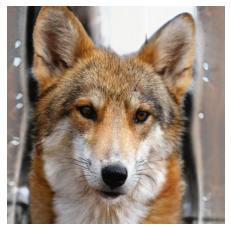

In [12]:
plt.imshow(rgb_img.squeeze(dim=0))
plt.axis("off")

Now generate a few more images:

Agora gere mais algumas imagens:

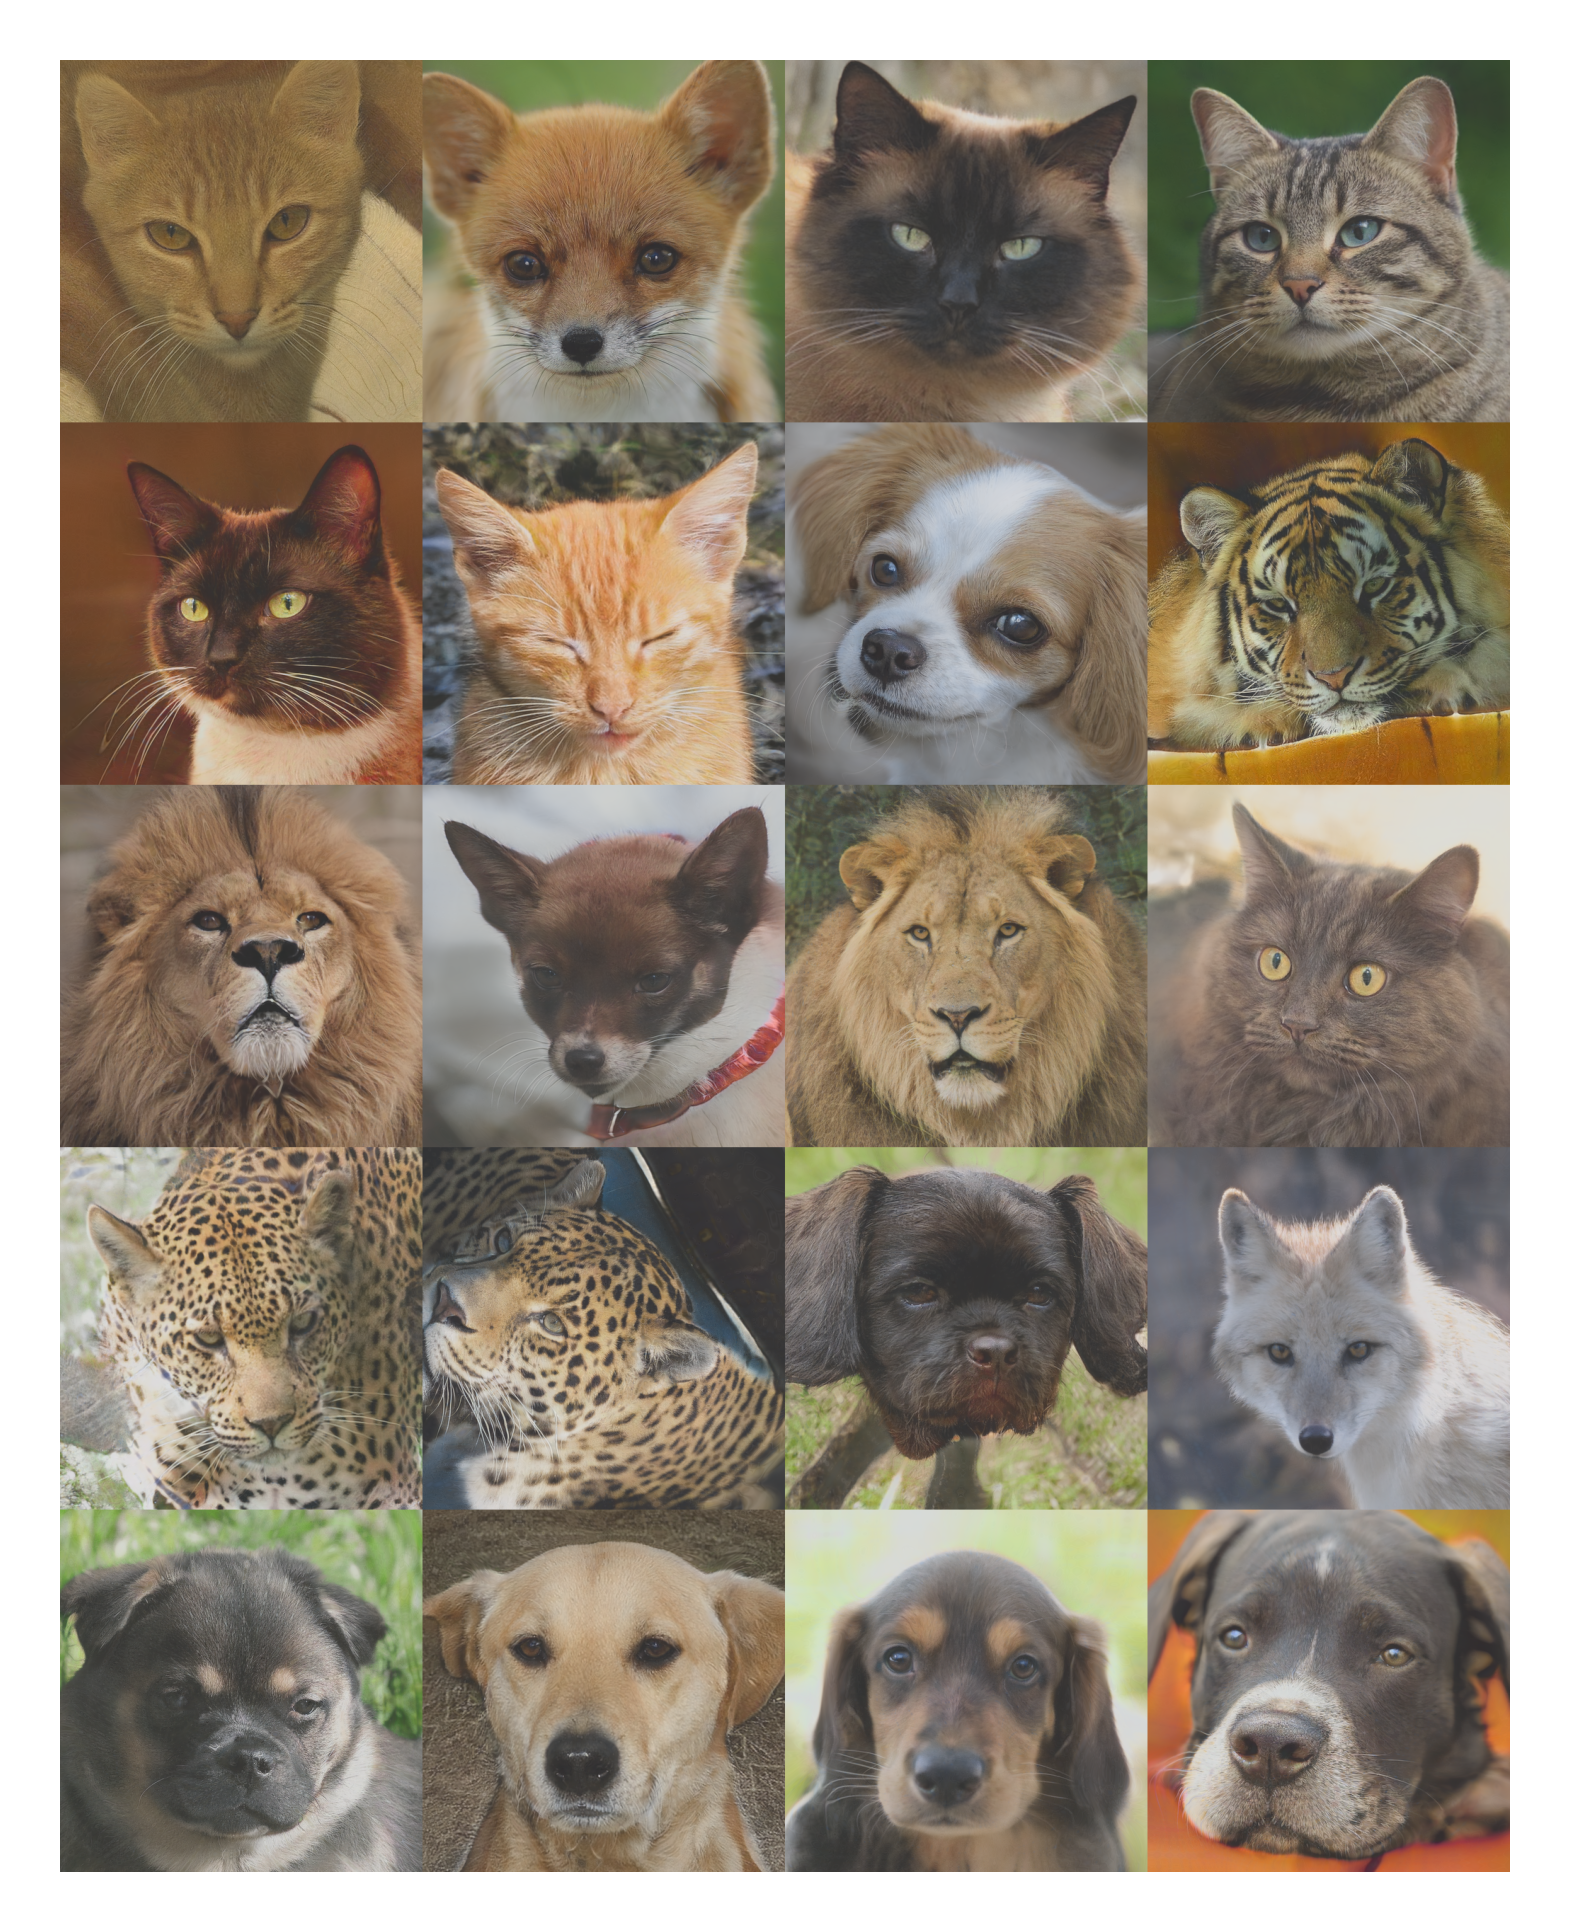

In [15]:
# YOUR CODE HERE
# YOUR CODE HERE
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np


z = torch.randn([20, z_dim]).cuda()

imgs = G(z, c) 

fig, sub = plt.subplots(dpi=600)
sub.imshow(
    np.transpose(
        make_grid(
            imgs, 
            padding=0,
            normalize=True,
            nrow=4,
        ).cpu(),
        (1,2,0)
    )
)
_ = sub.axis("off")

Look the details here! The fur and all the other details are reproduced almost flawlessly.

Veja os detalhes aqui! A pele e todos os outros detalhes são reproduzidos quase perfeitamente.